# Data preprocessing

**Requirement**: take the dataset of your project, *with* the missing values and the newly created variables.

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../titanic.csv")

In [100]:
# My target is survived 
y = df.Survived.values
# For demonstration, I'm taking only 4 columns
categorical_variables = ["Sex", "Embarked"]
quantitative_variables = ["Age", "Fare"]
X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

## Encoding categorical variables

#### One-hot encoding
For most ML algorithms, the categorical variables should be encoded using one-hot encoding. To do so, we can use `sklearn` one-hot-encoding class.

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
one_hot_encoder = OneHotEncoder()

In [43]:
one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

`encoded_X` is returned as the sparse representation of the matrix, that has to be accessed with `toarray()`.

In [44]:
one_hot_encoded_X.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [45]:
one_hot_encoder.get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S', 'x1_nan'],
      dtype=object)

**Questions**:
1. What ML algorithm requires one-hot encoding ?
2. Why do you think the matrix is stored as its sparse representation ?
3. Apply one-hot encoding to every categorical variables in your dataset and show how many new columns have been generated.
4. How does the one hot encoder behaves with missing values ?
5. Merge new array with the remaining quantitative variables to create `X_encoded`.

#### Ordinal encoding
Another way to encode categorical variables is through integer labels (**not recommended BUT sklearn requires it for some algorithms**). The class to do so is `LabelEncoder`.
It needs to be applied on a **per array basis** and then concatenated.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder = LabelEncoder()

In [55]:
encoded_vars = []
for categorical_var in X_categorical.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
    print(f"===== Encoded classes: {label_encoder.classes_}")

===== Encoded classes: ['female' 'male']
===== Encoded classes: ['C' 'Q' 'S' nan]


In [67]:
X_categorical = np.array(encoded_vars).T

**Questions**:
1. Apply the label encoder to every categorical variables in your dataset.
2. Concatenate the categorical variables together into a numpy array `X_categorical`.
3. Concatenate `X_categorical` to your other quantitative data.

## Imputing missing values
*See more at*: https://scikit-learn.org/stable/modules/impute.html

During class, we studied 2 main ways of dealing with missing values: static imputation and KNN imputation.

### Static imputation
Previously, we used the `fillna` method of pandas.
We can also use the class `SimpleImputer`.

The idea behind sklearn processers are the same than classifiers:
1. Call `fit` to "train" the preprocesser
2. Call `transform` to 
(or call `fit_transform` to do both at the same time).

In [82]:
from sklearn.impute import SimpleImputer

In [83]:
simple_imputer = SimpleImputer(strategy="mean")
simple_imputer.fit(X_quantitative)

X_imputed = simple_imputer.transform(X_quantitative)

**Questions**:
1. Use static imputation with mean and median for quantitative variables.
2. Compute statistical estimators of the variables and show how filling N/A affects the distribution.
3. Performs the same analysis using a plot.
4. Try doing the same with qualitative variables... what is the problem ? Perform the imputation using the `most_frequent` strategy either on labeled data or one-hot-encoded data.

### KNN imputation
Another possibility is to use the `KNNImputer`, that uses only KNN.

In [88]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_quantitative)

KNNImputer()

**Questions**:
1. Use KNN imputation with $k=1$, $k=5$ and $k=1000$. 
2. How does the value of $k$ impact your imputation ? Analyze it using statistical estimators and graph.
3. Try doing the same with qualitative variables... what is the problem ? How can you resolve it ?

Now, save your dataset as `X_preprocessed` and use it in the rest of the labs/in your project.

## Feature transformation

In class, we saw two possible ways of reducing features:
- Min-max scaling
- Z-scaling/Standard-scaling

Many scalers are available in sklearn: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

In [113]:
from sklearn.preprocessing import StandardScaler

min_max_scaler = StandardScaler()
min_max_scaler.fit(X_quantitative)
scaled_quantitative = min_max_scaler.transform(X_quantitative)

Text(0.5, 1.0, 'Yellow = survived, Purple = died')

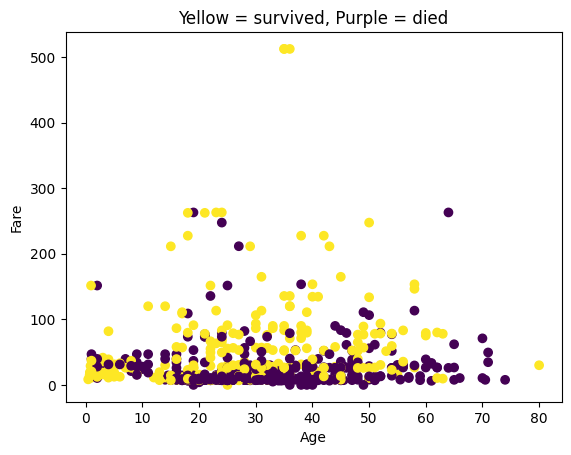

In [114]:
plt.scatter(X_quantitative[:,0], X_quantitative[:,1], c=y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Yellow = survived, Purple = died")

Text(0.5, 1.0, 'Yellow = survived, Purple = died')

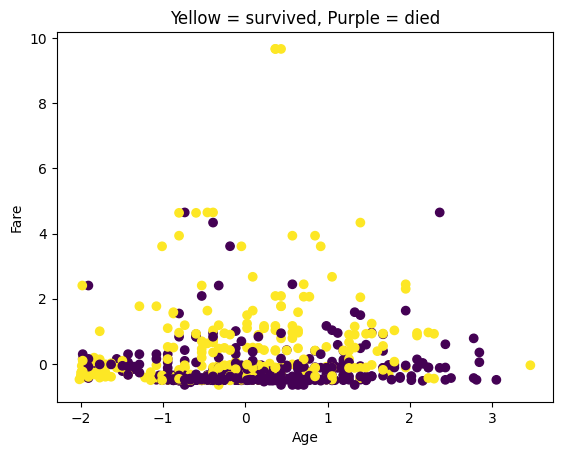

In [115]:
plt.scatter(scaled_quantitative[:,0], scaled_quantitative[:,1], c=y)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Yellow = survived, Purple = died")

**Questions**:
1. Can you apply every kind of scaling to every kind of algorithm ?
2. Apply min max scaling to your dataset and compare the repartition of the data on the parametric space.
2. Go back to the full pipeline and perform train/test validation with and without scaling and see how it affects the results (**be careful about data leaks**).

###